In [483]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [484]:
train = torch.Tensor([[1,2,3,4,5]])

In [485]:
output = torch.Tensor([[2,4,6,8,10]])

In [486]:
weights = torch.randn(1,1 , requires_grad = True)

In [487]:
weights

tensor([[0.5158]], requires_grad=True)

In [488]:
weights.size()

torch.Size([1, 1])

In [489]:
train.size()

torch.Size([1, 5])

In [490]:
output.size()

torch.Size([1, 5])

## Outcome

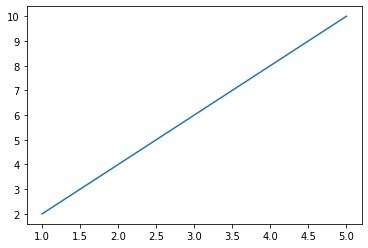

In [491]:
plt.plot(train[0] , output[0])

## Start

In [492]:
prediction = weights.t()@train

In [493]:
prediction

tensor([[0.5158, 1.0316, 1.5474, 2.0632, 2.5790]], grad_fn=<MmBackward>)

In [494]:
loss =  (output - prediction)**2

In [495]:
loss

tensor([[ 2.2028,  8.8113, 19.8255, 35.2453, 55.0708]], grad_fn=<PowBackward0>)

In [496]:
loss = loss.mean()

In [497]:
loss

tensor(24.2311, grad_fn=<MeanBackward0>)

## Training For one iteration

In [498]:
loss.backward()

In [499]:
with torch.no_grad():
    weights -= weights.grad * 1e-5
    weights.grad.zero_()

In [500]:
weights

tensor([[0.5161]], requires_grad=True)

In [501]:
newloss = (output - weights.t()@train)**2

In [502]:
newloss

tensor([[ 2.2019,  8.8075, 19.8168, 35.2298, 55.0466]], grad_fn=<PowBackward0>)

In [503]:
newloss = newloss.mean()

In [504]:
newloss

tensor(24.2205, grad_fn=<MeanBackward0>)

## Epoch

In [505]:
for i in range(2000):
    prediction = weights.t()@train
    loss = (output - prediction)**2
    loss = loss.mean()
    loss.backward()
    with torch.no_grad():
        weights -= weights.grad * 1e-3
        weights.grad.zero_()

In [506]:
newloss = ((output - weights.t()@train)**2).mean()

In [507]:
newloss

tensor(8.0368e-11, grad_fn=<MeanBackward0>)

In [508]:
weights

tensor([[2.0000]], requires_grad=True)